In [64]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings

##### Import the CSV Data as Panda DataFrame

In [65]:
df= pd.read_csv("C:/Users/honey/Downloads/House Price Prediction Dataset.csv")

In [66]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [67]:
df=df.iloc[:1000,1:10]

In [68]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
995,3261,2,4,3,1997,Downtown,Excellent,No,556357
996,3179,1,4,2,1929,Urban,Poor,Yes,58539
997,2606,5,3,1,1971,Urban,Good,No,182335
998,4723,4,3,2,2002,Rural,Poor,No,456521


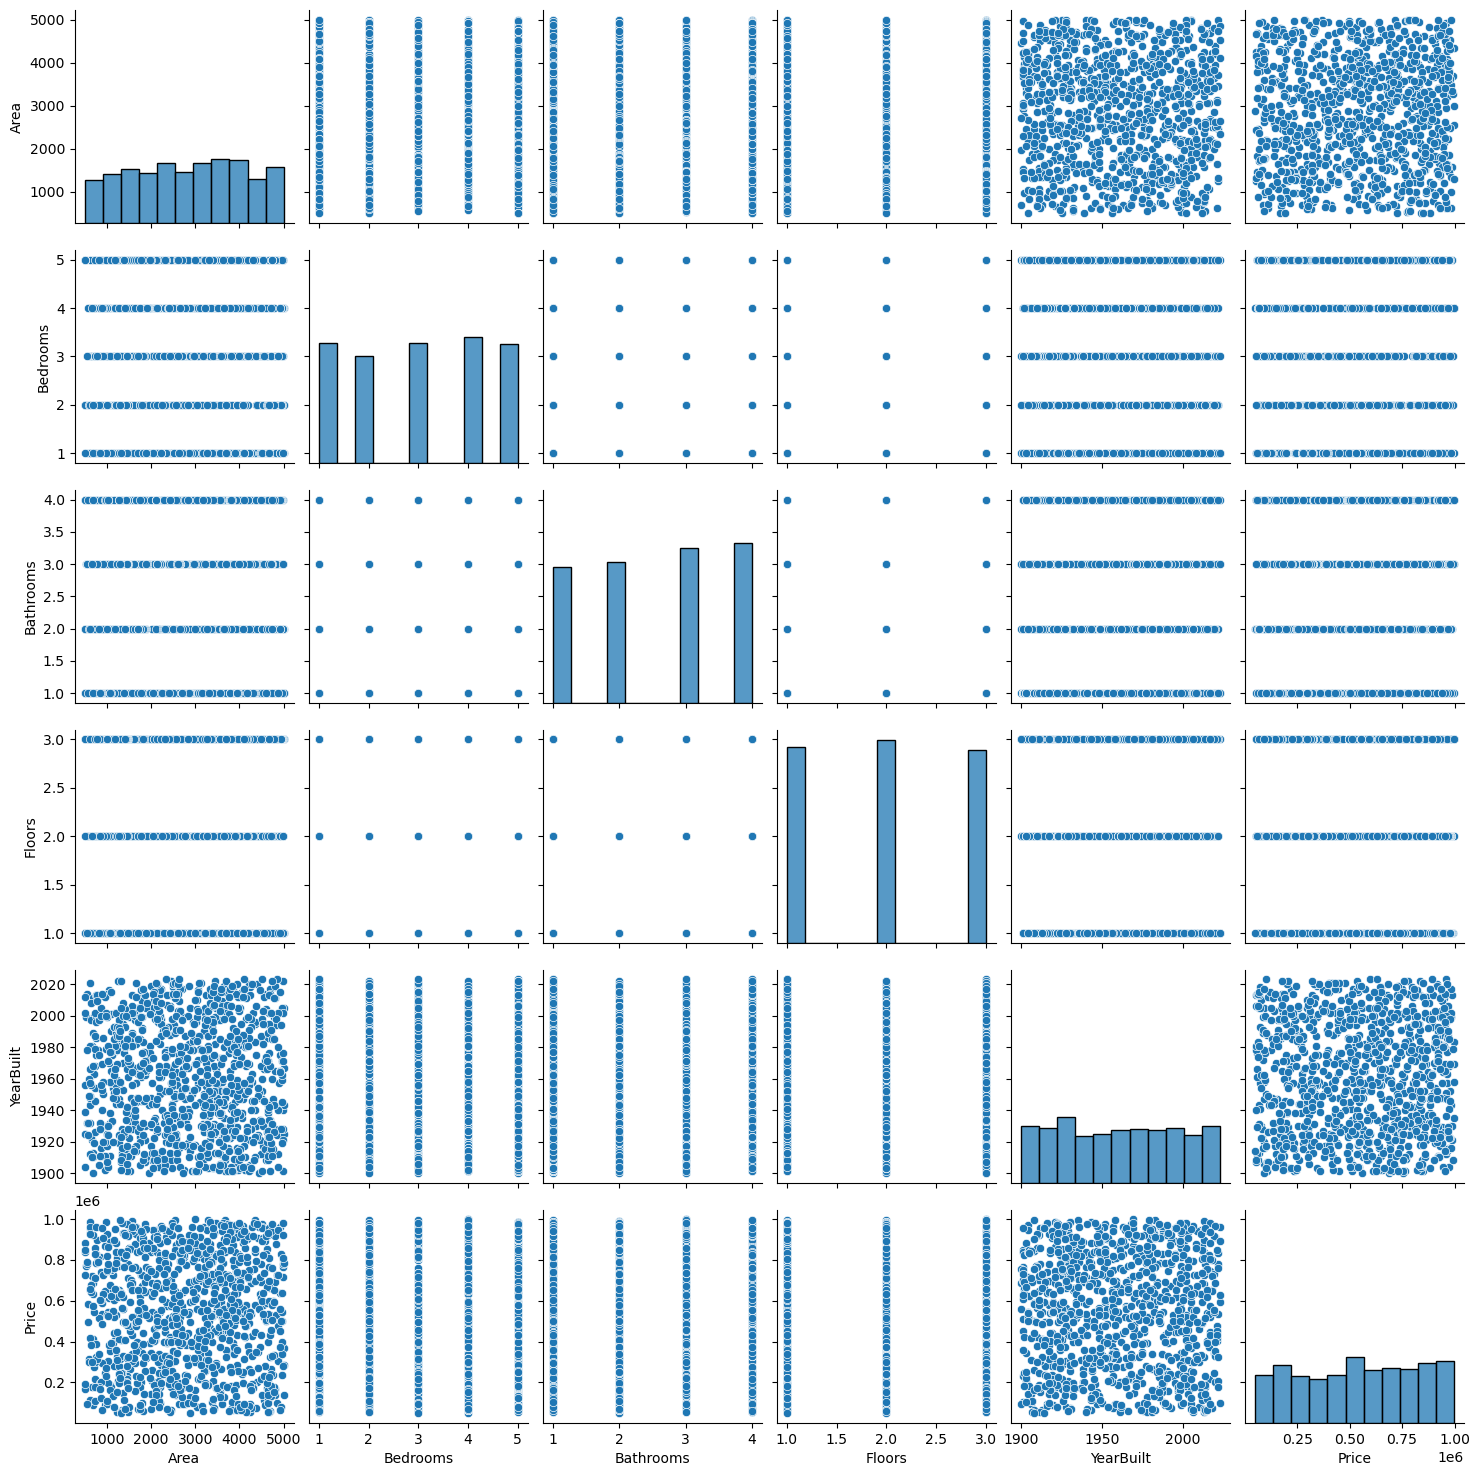

In [69]:
sns.pairplot(df)

 ### Data cleaning:

In [70]:
# Duplicate values:

df.duplicated().sum()

np.int64(0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       1000 non-null   int64 
 1   Bedrooms   1000 non-null   int64 
 2   Bathrooms  1000 non-null   int64 
 3   Floors     1000 non-null   int64 
 4   YearBuilt  1000 non-null   int64 
 5   Location   1000 non-null   object
 6   Condition  1000 non-null   object
 7   Garage     1000 non-null   object
 8   Price      1000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


In [72]:
# Null values:

df.isnull()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


### Preparing X and Y variables

##### Train/test split

In [73]:
#inputs

X = df.drop("Price", axis=1)

In [74]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,Downtown,Excellent,No
1,4272,5,4,3,1958,Downtown,Excellent,No
2,3592,2,2,3,1938,Downtown,Good,No
3,966,4,2,2,1902,Suburban,Fair,Yes
4,4926,1,4,2,1975,Downtown,Fair,Yes
...,...,...,...,...,...,...,...,...
995,3261,2,4,3,1997,Downtown,Excellent,No
996,3179,1,4,2,1929,Urban,Poor,Yes
997,2606,5,3,1,1971,Urban,Good,No
998,4723,4,3,2,2002,Rural,Poor,No


In [75]:
# target:

y= df["Price"]  


In [76]:
y

0      149919
1      424998
2      266746
3      244020
4      636056
        ...  
995    556357
996     58539
997    182335
998    456521
999    890249
Name: Price, Length: 1000, dtype: int64

In [77]:
# seperating Train and Test for the data:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [78]:
#creation of transformer columns(feature scaling):

num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_trans=OneHotEncoder()

preprocessing=ColumnTransformer(
    [
        ("OneHotEncoder",oh_trans,cat_cols),# for categorial type of data 
        ("StandardScaler",num_trans,num_cols),# for numerical type of data 
    ]
    
)

In [79]:
X_transformed = preprocessing.fit_transform(X)
X_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  1.27805059,
         1.23991422,  0.26368464],
       [ 1.        ,  0.        ,  0.        , ...,  1.27805059,
         1.23991422, -0.07118844],
       [ 1.        ,  0.        ,  0.        , ..., -0.5131906 ,
         1.23991422, -0.62931023],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.38242999,
        -1.22757676,  0.29159073],
       [ 0.        ,  1.        ,  0.        , ...,  0.38242999,
         0.00616873,  1.15667952],
       [ 0.        ,  1.        ,  0.        , ..., -0.5131906 ,
         0.00616873,  0.04043592]])

In [80]:
X_transformed.shape

(1000, 15)

In [81]:
# Build pipeline (preprocessing + model):

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)


In [82]:
# Step 6: Train model
pipeline.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
#Evaluate predictions using metrics:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_test)

try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", r2_score(y_test, y_pred))

R² score: -0.007015350533328579


In [84]:
print("RMSE:", rmse)

RMSE: 272717.3480509321


In [85]:
# Inspect transformed features:

X_train_transformed = pipeline.named_steps["preprocessing"].transform(X_train)


In [86]:
# Get transformed column names:

encoded_cols = pipeline.named_steps["preprocessing"].named_transformers_["OneHotEncoder"].get_feature_names_out(cat_cols)
all_cols = list(encoded_cols) + list(num_cols)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_cols)
print("\nTransformed Features:")
print(X_train_transformed_df.head())


Transformed Features:
   Location_Downtown  Location_Rural  Location_Suburban  Location_Urban  \
0                1.0             0.0                0.0             0.0   
1                0.0             0.0                0.0             1.0   
2                0.0             1.0                0.0             0.0   
3                0.0             0.0                0.0             1.0   
4                0.0             0.0                1.0             0.0   

   Condition_Excellent  Condition_Fair  Condition_Good  Condition_Poor  \
0                  1.0             0.0             0.0             0.0   
1                  0.0             0.0             1.0             0.0   
2                  0.0             0.0             0.0             1.0   
3                  0.0             0.0             1.0             0.0   
4                  0.0             0.0             0.0             1.0   

   Garage_No  Garage_Yes      Area  Bedrooms  Bathrooms    Floors  YearBuilt  
0 